In [7]:
import  pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [8]:
np.set_printoptions(precision=4,linewidth=100)

In [9]:
ipl_auction_df = pd.read_csv('Data/IPL IMB381IPL2013.csv')

In [10]:
ipl_auction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 26 columns):
Sl.NO.           130 non-null int64
PLAYER NAME      130 non-null object
AGE              130 non-null int64
COUNTRY          130 non-null object
TEAM             130 non-null object
PLAYING ROLE     130 non-null object
T-RUNS           130 non-null int64
T-WKTS           130 non-null int64
ODI-RUNS-S       130 non-null int64
ODI-SR-B         130 non-null float64
ODI-WKTS         130 non-null int64
ODI-SR-BL        130 non-null float64
CAPTAINCY EXP    130 non-null int64
RUNS-S           130 non-null int64
HS               130 non-null int64
AVE              130 non-null float64
SR-B             130 non-null float64
SIXERS           130 non-null int64
RUNS-C           130 non-null int64
WKTS             130 non-null int64
AVE-BL           130 non-null float64
ECON             130 non-null float64
SR-BL            130 non-null float64
AUCTION YEAR     130 non-null int64
BASE PRICE   

# Encoding x features

In [11]:
X_features = ['AGE', 'COUNTRY', 'PLAYING ROLE',
'T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B',
'ODI-WKTS', 'ODI-SR-BL', 'CAPTAINCY EXP', 'RUNS-S',
'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS',
'AVE-BL', 'ECON', 'SR-BL'] 



In [12]:
categorical_features ={'AGE','COUNTRY','PLAYING ROLE','CAPTAINCY EXP'}

In [13]:
ipl_auction_encoded_df = pd.get_dummies(ipl_auction_df[X_features],columns = categorical_features,drop_first=True)

In [14]:
X_features = ipl_auction_encoded_df.columns
print(X_features)

Index(['T-RUNS', 'T-WKTS', 'ODI-RUNS-S', 'ODI-SR-B', 'ODI-WKTS', 'ODI-SR-BL',
       'RUNS-S', 'HS', 'AVE', 'SR-B', 'SIXERS', 'RUNS-C', 'WKTS', 'AVE-BL',
       'ECON', 'SR-BL', 'PLAYING ROLE_Batsman', 'PLAYING ROLE_Bowler',
       'PLAYING ROLE_W. Keeper', 'COUNTRY_BAN', 'COUNTRY_ENG', 'COUNTRY_IND',
       'COUNTRY_NZ', 'COUNTRY_PAK', 'COUNTRY_SA', 'COUNTRY_SL', 'COUNTRY_WI',
       'COUNTRY_ZIM', 'CAPTAINCY EXP_1', 'AGE_2', 'AGE_3'],
      dtype='object')


# lets split the data

In [15]:
X = sm.add_constant(ipl_auction_encoded_df)

C:\Users\Dell\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [16]:
Y = ipl_auction_df['SOLD PRICE']

In [17]:
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,train_size =0.8,random_state=50)

# fitting the model

In [18]:
ipl_model = sm.OLS(train_Y,train_X).fit()

In [19]:
ipl_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Ordinary least squares
========================================================================================
Model:                     OLS                     Adj. R-squared:            0.447     
Dependent Variable:        SOLD PRICE              AIC:                       2958.9833 
Date:                      2020-09-04 11:25        BIC:                       3043.6038 
No. Observations:          104                     Log-Likelihood:            -1447.5   
Df Model:                  31                      F-statistic:               3.682     
Df Residuals:              72                      Prob (F-statistic):        2.68e-06  
R-squared:                 0.613                   Scale:                     1.0385e+11
----------------------------------------------------------------------------------------
                          Coef.       Std.Err.     t    P>|t|     [0.025       0.975]   
----------------------------------------------------------------------------------------
const                   208160.9909 226783.0636  0.9179 0.3617 -243922.7839  660244.7656
T-RUNS                     -45.4548     28.6831 -1.5847 0.1174    -102.6335      11.7238
T-WKTS                      72.2181    577.4629  0.1251 0.9008   -1078.9332    1223.3694
ODI-RUNS-S                  63.2699     28.2665  2.2383 0.0283       6.9216     119.6182
ODI-SR-B                  -373.3406   1585.2318 -0.2355 0.8145   -3533.4424    2786.7613
ODI-WKTS                   454.2875    820.3922  0.5537 0.5815   -1181.1345    2089.7096
ODI-SR-BL                -2188.6673   1755.6726 -1.2466 0.2166   -5688.5367    1311.2021
RUNS-S                      79.7563    154.3170  0.5168 0.6069    -227.8690     387.3816
HS                       -1415.2475   2541.0315 -0.5570 0.5793   -6480.7013    3650.2062
AVE                       8201.2890   7592.7226  1.0802 0.2837   -6934.5268   23337.1048
SR-B                     -1162.1250   1316.0923 -0.8830 0.3802   -3785.7070    1461.4570
SIXERS                    2169.7328   3176.4947  0.6831 0.4968   -4162.4936    8501.9593
RUNS-C                      82.6112    287.4622  0.2874 0.7746    -490.4344     655.6567
WKTS                      2470.7284   7147.7319  0.3457 0.7306  -11778.0147   16719.4715
AVE-BL                    3186.9655  11214.0173  0.2842 0.7771  -19167.7694   25541.7004
ECON                      3628.8034  12890.4119  0.2815 0.7791  -22067.7632   29325.3700
SR-BL                     2277.4795  16832.6149  0.1353 0.8928  -31277.7250   35832.6840
PLAYING ROLE_Batsman    212628.8988 147579.5474  1.4408 0.1540  -81565.5519  506823.3496
PLAYING ROLE_Bowler     -25923.3259 121692.4342 -0.2130 0.8319 -268512.7598  216666.1080
PLAYING ROLE_W. Keeper  108430.9416 224924.9226  0.4821 0.6312 -339948.6968  556810.5799
COUNTRY_BAN             -10332.7069 429228.2832 -0.0241 0.9809 -865983.6510  845318.2373
COUNTRY_ENG             667688.4997 235980.7275  2.8294 0.0060  197269.5170 1138107.4824
COUNTRY_IND             213176.5488 121241.6752  1.7583 0.0829  -28514.3134  454867.4109
COUNTRY_NZ               53451.8208 178464.6945  0.2995 0.7654 -302311.0455  409214.6871
COUNTRY_PAK             121578.0917 179698.4195  0.6766 0.5008 -236644.1604  479800.3439
COUNTRY_SA              -38362.9059 129603.1455 -0.2960 0.7681 -296722.0546  219996.2428
COUNTRY_SL               26678.0160 170466.9424  0.1565 0.8761 -313141.6229  366497.6549
COUNTRY_WI             -160558.6187 174534.8796 -0.9199 0.3607 -508487.5423  187370.3049
COUNTRY_ZIM            -147114.5932 383246.1496 -0.3839 0.7022 -911101.8294  616872.6429
CAPTAINCY EXP_1         185040.1467 121729.3142  1.5201 0.1329  -57622.8061  427703.0994
AGE_2                  -185148.2832 119372.8704 -1.5510 0.1253 -423113.7511   52817.1847
AGE_3                  -144211.0292 158809.2171 -0.9081 0.3669 -460791.4175  172369.3591
----------------------------------------------------------------

# variace inflation factor (VIF) to check multi-collinaerity

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [35]:
def get_vif_factors(X):
    X_matrix = X.values
    vif = [variance_inflation_factor(X_matrix,i) for i in range(X_matrix.shape[1])]
    vif_factors = pd.DataFrame()
    vif_factors['column']= X.columns
    vif_factors['VIF']=vif
    return vif_factors
    

In [36]:
vif_factors = get_vif_factors(X[X_features])
vif_factors

,column,VIF
0,T-RUNS,12.612694
1,T-WKTS,7.679284
2,ODI-RUNS-S,16.426209
3,ODI-SR-B,13.829376
4,ODI-WKTS,9.951800
5,ODI-SR-BL,4.426818
6,RUNS-S,16.135407
7,HS,22.781017
8,AVE,25.226566
9,SR-B,21.576204


In [38]:
columns_with_large_vif = vif_factors[vif_factors['VIF']>4].column

In [42]:
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(12,10))

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

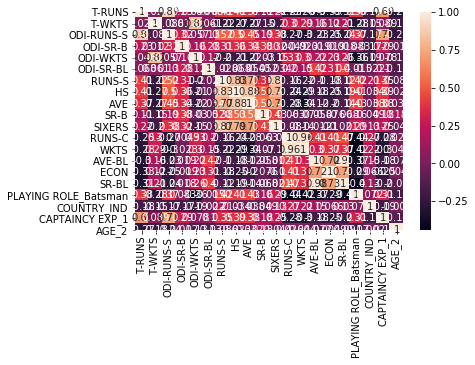

In [43]:
sn.heatmap(X[columns_with_large_vif].corr(),annot =True);